In [160]:
import numpy as np

In [162]:
import pandas as pd

In [164]:
from sklearn.ensemble import RandomForestClassifier 

DATA GATHERING

In [166]:
df = pd.read_csv('Titanic-Dataset.csv')

In [168]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [170]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


EDA

In [172]:
women = df.loc[df.Sex == 'female']['Survived']

In [174]:
women

1      1
2      1
3      1
8      1
9      1
      ..
880    1
882    0
885    0
887    1
888    0
Name: Survived, Length: 314, dtype: int64

In [176]:
sum(women)

233

In [178]:
len(women)

314

In [180]:
rate_women = sum(women)/len(women)

In [182]:
rate_women

0.7420382165605095

In [184]:
df[df.Sex=='female'].Survived

1      1
2      1
3      1
8      1
9      1
      ..
880    1
882    0
885    0
887    1
888    0
Name: Survived, Length: 314, dtype: int64

In [186]:
men = df.loc[df.Sex == 'male']['Survived']

In [188]:
men

0      0
4      0
5      0
6      0
7      0
      ..
883    0
884    0
886    0
889    1
890    0
Name: Survived, Length: 577, dtype: int64

In [190]:
rate_men = sum(men)/len(men)

In [192]:
rate_men

0.18890814558058924

In [194]:
y = df['Survived']

In [196]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [120]:
x = ['Pclass', 'Sex', 'SibSp', 'Parch']

In [136]:
df[x]

,Pclass,Sex,SibSp,Parch
0,3,male,1,0
1,1,female,1,0
2,3,female,0,0
3,1,female,1,0
4,3,male,0,0
...,...,...,...,...
886,2,male,0,0
887,1,female,0,0
888,3,female,1,2
889,1,male,0,0


In [138]:
pd.get_dummies(df, columns=['Sex'])

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,True,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,True,False
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,False,True


In [140]:
d = pd.get_dummies(df[x])

In [142]:
d

,Pclass,SibSp,Parch,Sex_female,Sex_male
0,3,1,0,False,True
1,1,1,0,True,False
2,3,0,0,True,False
3,1,1,0,True,False
4,3,0,0,False,True
...,...,...,...,...,...
886,2,0,0,False,True
887,1,0,0,True,False
888,3,1,2,True,False
889,1,0,0,False,True


In [198]:
df['Sex_male'] = df['Sex'].map({'male': 1, 'female': 0})
df['Sex_female'] = df['Sex'].map({'male': 0, 'female': 1})

In [200]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male,Sex_female
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0


In [148]:
y = df['Survived']

In [150]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [152]:
x = ['Pclass', 'Sex_male', 'Sex_male', 'SibSp', 'Parch']

In [154]:
df[x]

,Pclass,Sex_male,Sex_male,SibSp,Parch
0,3,1,1,1,0
1,1,0,0,1,0
2,3,0,0,0,0
3,1,0,0,1,0
4,3,1,1,0,0
...,...,...,...,...,...
886,2,1,1,0,0
887,1,0,0,0,0
888,3,0,0,1,2
889,1,1,1,0,0


In [260]:
x = df.drop(['Survived', 'PassengerId', 'Name', 'Sex', 'Ticket', 'Fare',	'Cabin',	'Embarked'	], axis=1)

In [264]:
x.fillna(0)

,Pclass,Age,SibSp,Parch,Sex_male,Sex_female
0,3,22.0,1,0,1,0
1,1,38.0,1,0,0,1
2,3,26.0,0,0,0,1
3,1,35.0,1,0,0,1
4,3,35.0,0,0,1,0
...,...,...,...,...,...,...
886,2,27.0,0,0,1,0
887,1,19.0,0,0,0,1
888,3,0.0,1,2,0,1
889,1,26.0,0,0,1,0


In [208]:
from sklearn.model_selection import train_test_split

In [210]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)

In [212]:
print(x_train)

     Pclass  SibSp  Parch  Sex_male  Sex_female
151       1      1      0         0           1
753       3      0      0         1           0
746       3      1      1         1           0
684       2      1      1         1           0
887       1      0      0         0           1
..      ...    ...    ...       ...         ...
31        1      1      0         0           1
488       3      0      0         1           0
40        3      1      0         0           1
742       1      2      2         0           1
595       3      1      1         1           0

[712 rows x 5 columns]


In [214]:
print(x_test)

     Pclass  SibSp  Parch  Sex_male  Sex_female
727       3      0      0         0           1
668       3      0      0         1           0
210       3      0      0         1           0
654       3      0      0         0           1
228       2      0      0         1           0
..      ...    ...    ...       ...         ...
629       3      0      0         1           0
430       1      0      0         1           0
432       2      1      0         0           1
431       3      1      0         0           1
829       1      0      0         0           1

[179 rows x 5 columns]


In [256]:
model = RandomForestClassifier(n_estimators=250, max_depth=7, random_state=1)

In [258]:
model.fit(x, y)

RandomForestClassifier(max_depth=7, n_estimators=250, random_state=1)

In [248]:
predictions = model.predict((x))

In [250]:
predictions

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [252]:
output = pd.DataFrame({'PassengerID':df['PassengerId'], 'Survived':predictions	})

In [254]:
output

,PassengerID,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
886,887,0
887,888,1
888,889,0
889,890,0


In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC

In [326]:
df = pd.read_csv('Titanic-Dataset.csv')

DATA EXPLORATION

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [330]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [332]:
df['Age'] = df['Age'].fillna(df.Age.median())
df['Embarked'] = df['Embarked'].fillna(df.Embarked.mode()[0])

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [336]:
df.isna().sum()



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [338]:
df.drop(['Cabin'], axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [340]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [342]:
df.drop('Name', axis=1, inplace=True)

In [344]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [346]:
cols = list(df.columns.values)

In [348]:
cols.pop(cols.index('Survived'))

'Survived'

In [350]:
df = df[cols+['Survived']]

In [352]:
df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [354]:
df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: >

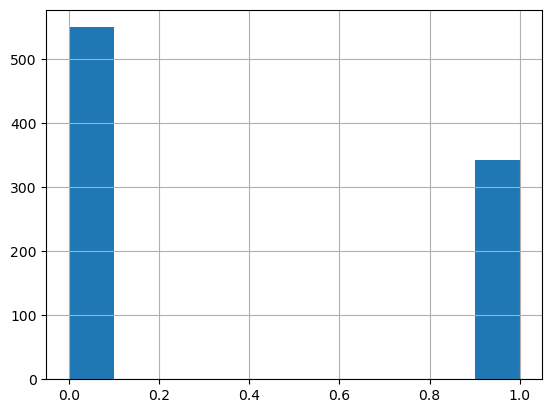

In [356]:
df.Survived.hist()

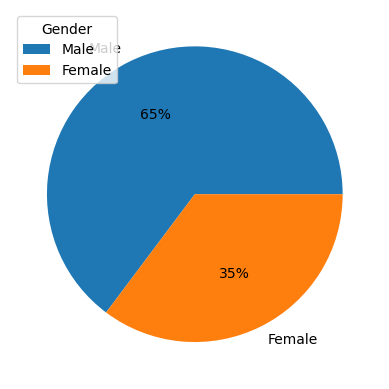

In [362]:
gender = df.Sex.value_counts()
gender_lables=['Male', 'Female']
plt.pie(gender, labels = gender_lables, autopct = '%.0f%%')
plt.legend(title='Gender')
plt.show()

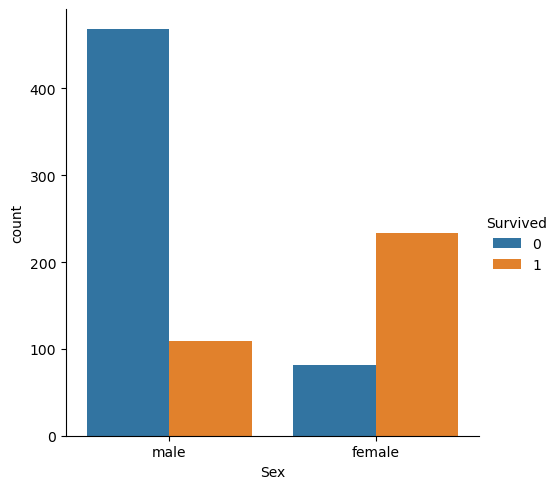

In [364]:
sns.catplot(data=df,x='Sex',kind='count',hue='Survived')

In [403]:
x = df.drop(['Fare', 'Embarked', 'Ticket', 'Survived', 'PassengerId'], axis = 1)
y = df.Survived

In [405]:
from sklearn.preprocessing import LabelEncoder

In [407]:
lbl_enc = LabelEncoder()

In [409]:
x['Sex'] = lbl_enc.fit_transform(x['Sex'])

In [411]:
np.random.state = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [417]:
model = LogisticRegression()

In [421]:
model.fit(x_train, y_train)

ValueError: could not convert string to float: 'C124'